# WINE prediction, price and the rating of tasters.

### Reading the file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

wino = pd.read_csv('winemag-data-2017-2020.csv')
wino

# Country : that the wine is from
# Points : WineEnthusiast rated the wine on a scale of 1-100
# Designation : The vineyard within the winery where the grapes that made the wine are from

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,Assobio Branco,87,14.0,Douro,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",NaN,87,25.0,California,Paso Robles,Central Coast,Matt Kettmann,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@mattkettmann,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,NaN,87,14.0,Lechkhumi,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley
3,Kosovo,"This wine has aromas of black berry, dried red...",NaN,87,13.0,Rahoveci Valley,NaN,NaN,Jeff Jenssen,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Stone Castle 2013 Shiraz (Rahoveci Valley),Shiraz,2013,Stone Castle
4,Italy,"A blend of organically cultivated Groppello, M...",San'Emiliano Chiaretto,87,13.0,Lombardy,Valtènesi,NaN,Kerin O’Keefe,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@kerinokeefe,Pratello 2016 San'Emiliano Chiaretto Rosato (V...,Rosato,2016,Pratello
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81110,Portugal,"A blend of Syrah and Alicante Bouschet, this i...",Quinta da Fonte Souto Vinho do Souto,94,55.0,Alentejo,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Symington Family Estates 2017 Quinta da Fonte ...,Portuguese Red,2017,Symington Family Estates
81111,US,Fans of Paso Robles richness should flock to t...,Nuts & Bolts,94,52.0,California,California,California Other,Matt Kettmann,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@mattkettmann,Herman Story 2017 Nuts & Bolts Syrah (California),Syrah,2017,Herman Story
81112,Italy,"Wild berry, blue flower, crushed herb, camphor...",NaN,94,40.0,Tuscany,Vino Nobile di Montepulciano,NaN,Kerin O’Keefe,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@kerinokeefe,Boscarelli 2016 Vino Nobile di Montepulciano,Red Blends,2016,Boscarelli
81113,Italy,"Enveloping and delicious, this full-bodied, ve...",Madonna delle Querce,94,113.0,Tuscany,Vino Nobile di Montepulciano,NaN,Kerin O’Keefe,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@kerinokeefe,Dei 2015 Madonna delle Querce (Vino Nobile di...,Sangiovese,2015,Dei


### Understand the data

In [2]:
wino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81115 entries, 0 to 81114
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                81110 non-null  object 
 1   description            81115 non-null  object 
 2   designation            59796 non-null  object 
 3   points                 81115 non-null  int64  
 4   price                  76468 non-null  float64
 5   province               81110 non-null  object 
 6   region_1               68202 non-null  object 
 7   region_2               31221 non-null  object 
 8   taster_name            80965 non-null  object 
 9   taster_photo           80965 non-null  object 
 10  taster_twitter_handle  80039 non-null  object 
 11  title                  81115 non-null  object 
 12  variety                81115 non-null  object 
 13  vintage                81115 non-null  object 
 14  winery                 81115 non-null  object 
dtypes:

### Dealing with nan values.

In [3]:
wino.isnull().sum()/len(wino)

country                  0.000062
description              0.000000
designation              0.262824
points                   0.000000
price                    0.057289
province                 0.000062
region_1                 0.159194
region_2                 0.615102
taster_name              0.001849
taster_photo             0.001849
taster_twitter_handle    0.013265
title                    0.000000
variety                  0.000000
vintage                  0.000000
winery                   0.000000
dtype: float64

In [4]:
wino['country'].value_counts(dropna=False)

US                        32174
France                    18401
Italy                     10679
Portugal                   3954
Spain                      3475
Austria                    2276
Australia                  1874
Argentina                  1787
Chile                      1597
Germany                    1549
New Zealand                1066
South Africa                634
Israel                      387
Uruguay                     206
Greece                      172
Canada                      142
England                     101
Bulgaria                     99
Hungary                      92
Romania                      77
Georgia                      70
Moldova                      58
Brazil                       43
Turkey                       30
Switzerland                  21
Croatia                      16
Armenia                      15
Luxembourg                   15
Kosovo                       14
Serbia                       11
Morocco                      11
Lebanon 

In [5]:
wino[wino['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
30175,NaN,Winemaker: Andrea Mullineux. An ode to the mat...,Cape Winemakers Guild Radicales Libres,93,NaN,NaN,NaN,NaN,Lauren Buzzeo,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@laurbuzz,Leeu Passant 2014 Cape Winemakers Guild Radica...,Chardonnay,2014,Leeu Passant
35337,NaN,"Bright red-violet to the eye, this wine has ar...",NaN,88,30.0,NaN,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Dato's 2018 Red,Jani-Skhilatubani,2018,Dato's
48764,NaN,"Aromas of waxy melon, orange rind, pear flesh ...",NaN,90,20.0,NaN,NaN,NaN,Lauren Buzzeo,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@laurbuzz,Leeuwenkuil 2015 Marsanne,Marsanne,2015,Leeuwenkuil
56208,NaN,"Aromas of apple skin, beesway, musk melon and ...",NaN,89,20.0,NaN,NaN,NaN,Lauren Buzzeo,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@laurbuzz,Leeuwenkuil 2015 Grenache Blanc,Grenache Blanc,2015,Leeuwenkuil
74904,NaN,Grapy berry and black cherry aromas are jumpy ...,Serie Riberas Gran Reserva Ribera del Loncomilla,89,17.0,NaN,NaN,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@wineschach,Concha y Toro 2018 Serie Riberas Gran Reserva ...,Syrah,2018,Concha y Toro


In [6]:
# There are only 5 rows which are nan values in 'country' column. So i decided to find out where are these wines from. 

#1
wino_country = wino['country']
wino_country[30175]
wino_country[30175] = 'South Africa'
#2
wino_country = wino['country']
wino_country[35337]
wino_country[35337] = 'Georgia'
#3
wino_country = wino['country']
wino_country[48764]
wino_country[48764] = 'South Africa'
#4
wino_country = wino['country']
wino_country[56208]
wino_country[56208] = 'South Africa'
#5
wino_country = wino['country']
wino_country[74904]
wino_country[74904] = 'Chile'

<ipython-input-6-bad3c1d2d1f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wino_country[30175] = 'South Africa'
<ipython-input-6-bad3c1d2d1f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wino_country[35337] = 'Georgia'
<ipython-input-6-bad3c1d2d1f3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wino_country[48764] = 'South Africa'
<ipython-input-6-bad3c1d2d1f3>:18: SettingWithCopyWarning: 
A value is trying to be set on 

In [7]:
wino[wino['designation'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
1,US,"Black plum juice, black pepper, caramel and sm...",NaN,87,25.0,California,Paso Robles,Central Coast,Matt Kettmann,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@mattkettmann,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,NaN,87,14.0,Lechkhumi,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley
3,Kosovo,"This wine has aromas of black berry, dried red...",NaN,87,13.0,Rahoveci Valley,NaN,NaN,Jeff Jenssen,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Stone Castle 2013 Shiraz (Rahoveci Valley),Shiraz,2013,Stone Castle
6,US,"Big, bold and oaky, this wine smells like butt...",NaN,87,18.0,California,North Coast,North Coast,Jim Gordon,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@gordone_cellars,Tierra y Mar 2013 Chardonnay (North Coast),Chardonnay,2013,Tierra y Mar
9,Turkey,This wine made from an aromatic indigenous Tur...,NaN,87,18.0,Ankara,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Vinkara 2015 Narince (Ankara),Narince,2015,Vinkara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81094,France,This wine is driven by power and dense tannins...,NaN,95,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Château Pavie Macquin 2017 Saint-Émilion,Bordeaux-style Red Blend,2017,Château Pavie Macquin
81098,Italy,"Rose, mature red berry and wild herb aromas mi...",NaN,95,35.0,Tuscany,Chianti Classico,NaN,Kerin O’Keefe,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@kerinokeefe,Castello di Ama 2017 Chianti Classico,Red Blends,2017,Castello di Ama
81099,US,"This is a brawny, generous and powerful wine t...",NaN,95,95.0,California,Napa Valley,Napa,Virginie Boone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vboone,Yao Ming 2016 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,2016,Yao Ming
81108,US,"With 6% Cabernet Franc, 4% Merlot and 2% Malbe...",NaN,94,100.0,California,Mount Veeder,Napa,Virginie Boone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vboone,Mt. Brave 2016 Cabernet Sauvignon (Mount Veeder),Cabernet Sauvignon,2016,Mt. Brave


In [8]:
wino['designation'].fillna('unknown',inplace=True)

In [9]:
wino['region_1'].fillna('unknown',inplace=True)

In [10]:
wino['province'].fillna('unknown',inplace=True)

In [11]:
# i dropped these rows.. i dont want to add mean value or etc.

print(wino['price'].isnull().sum())

4647


In [12]:
wino = wino.dropna(subset=['price'])

In [13]:
wino = wino.reset_index(drop=True)

In [14]:
# for my model, i dont need these columns.

wino = wino.drop(['taster_name', 'taster_photo', 'taster_twitter_handle', 'region_2'], axis=1)
wino

,country,description,designation,points,price,province,region_1,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,Assobio Branco,87,14.0,Douro,unknown,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",unknown,87,25.0,California,Paso Robles,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,unknown,87,14.0,Lechkhumi,unknown,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley
3,Kosovo,"This wine has aromas of black berry, dried red...",unknown,87,13.0,Rahoveci Valley,unknown,Stone Castle 2013 Shiraz (Rahoveci Valley),Shiraz,2013,Stone Castle
4,Italy,"A blend of organically cultivated Groppello, M...",San'Emiliano Chiaretto,87,13.0,Lombardy,Valtènesi,Pratello 2016 San'Emiliano Chiaretto Rosato (V...,Rosato,2016,Pratello
...,...,...,...,...,...,...,...,...,...,...,...
76463,Portugal,"A blend of Syrah and Alicante Bouschet, this i...",Quinta da Fonte Souto Vinho do Souto,94,55.0,Alentejo,unknown,Symington Family Estates 2017 Quinta da Fonte ...,Portuguese Red,2017,Symington Family Estates
76464,US,Fans of Paso Robles richness should flock to t...,Nuts & Bolts,94,52.0,California,California,Herman Story 2017 Nuts & Bolts Syrah (California),Syrah,2017,Herman Story
76465,Italy,"Wild berry, blue flower, crushed herb, camphor...",unknown,94,40.0,Tuscany,Vino Nobile di Montepulciano,Boscarelli 2016 Vino Nobile di Montepulciano,Red Blends,2016,Boscarelli
76466,Italy,"Enveloping and delicious, this full-bodied, ve...",Madonna delle Querce,94,113.0,Tuscany,Vino Nobile di Montepulciano,Dei 2015 Madonna delle Querce (Vino Nobile di...,Sangiovese,2015,Dei


In [15]:
wino.isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
vintage        0
winery         0
dtype: int64

In [16]:
wino['description'].value_counts

<bound method IndexOpsMixin.value_counts of 0        This is a deliciously creamy wine with light w...
1        Black plum juice, black pepper, caramel and sm...
2        Aromas of green apple and white flowers prepar...
3        This wine has aromas of black berry, dried red...
4        A blend of organically cultivated Groppello, M...
                               ...                        
76463    A blend of Syrah and Alicante Bouschet, this i...
76464    Fans of Paso Robles richness should flock to t...
76465    Wild berry, blue flower, crushed herb, camphor...
76466    Enveloping and delicious, this full-bodied, ve...
76467    Sourced from 30-plus year-old vines in a south...
Name: description, Length: 76468, dtype: object>

### How many unique values ?

In [17]:
wino.winery.nunique()

12201

In [18]:
wino.country.value_counts()

US                        31892
France                    16074
Italy                      9550
Portugal                   3810
Spain                      3375
Austria                    2010
Australia                  1837
Argentina                  1743
Chile                      1555
Germany                    1515
New Zealand                1026
South Africa                495
Israel                      381
Uruguay                     200
Greece                      159
Canada                      141
Bulgaria                     99
England                      90
Hungary                      88
Romania                      77
Georgia                      71
Moldova                      54
Brazil                       33
Turkey                       30
Switzerland                  20
Croatia                      16
Armenia                      15
Luxembourg                   15
Kosovo                       12
Serbia                       11
Morocco                      11
Lebanon 

### EDA. 

In [19]:
large_countries = wino.country.value_counts()[:12]

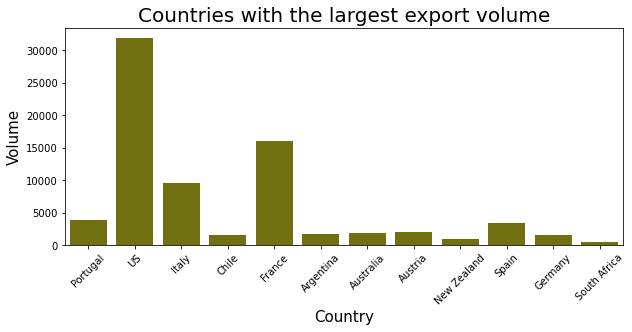

In [20]:
plt.figure(figsize=(10,4))

country = wino.country.value_counts()[:12]

graph = sns.countplot(x='country', 
                  data=wino[wino.country.isin(large_countries.index.values)],
                 color='olive')
graph.set_title("Countries with the largest export volume", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Volume", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)

plt.show()

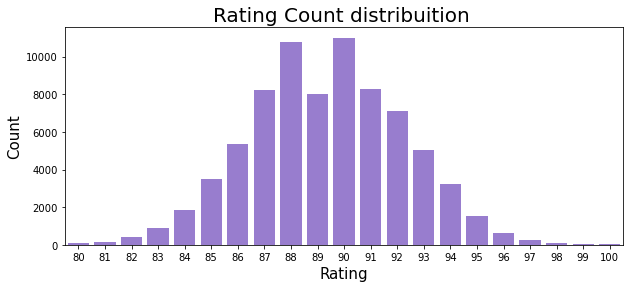

In [21]:
plt.figure(figsize=(10, 4))
graph = sns.countplot(x='points', data=wino, color='mediumpurple')
graph.set_title("Rating Count distribuition ", fontsize=20)
graph.set_xlabel("Rating", fontsize=15) 
graph.set_ylabel("Count", fontsize=15)
plt.show()

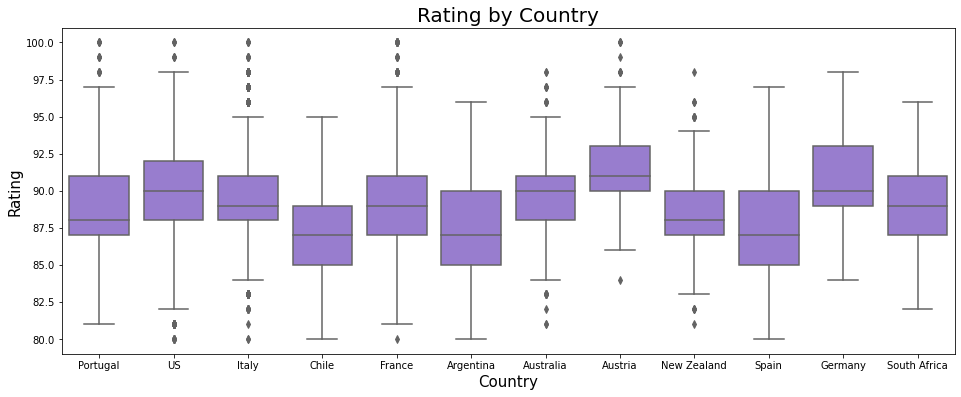

In [22]:
plt.figure(figsize=(16,6))

graph = sns.boxplot(x='country', y='points',
                 data=wino[wino.country.isin(large_countries.index.values)],
                 color='mediumpurple')
graph.set_title("Rating by Country", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Rating", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

In [23]:
#most productive regions
most_regions = wino['region_1'].value_counts()[:100].index 
print(wino[wino['region_1'].isin(most_regions)].groupby('region_1').points.mean().sort_values(ascending=False)[:20])
#Regions with the best rating from most productive onece

region_1
Châteauneuf-du-Pape              92.465704
Santa Maria Valley               91.923990
Sta. Rita Hills                  91.806936
Oakville                         91.696970
Ribbon Ridge                     91.633333
Anderson Valley                  91.455041
Santa Lucia Highlands            91.274336
Adelaida District                91.193548
Saint-Émilion                    91.172185
Alsace                           91.065068
Edna Valley                      91.063830
Dundee Hills                     91.062374
Santa Cruz Mountains             91.053571
Sonoma Coast                     91.051921
Barbaresco                       91.010040
Happy Canyon of Santa Barbara    90.986842
Moulin-à-Vent                    90.972973
Barolo                           90.957447
Russian River Valley             90.789378
Brunello di Montalcino           90.740872
Name: points, dtype: float64


In [24]:
#most productive wineries
most_wineries = wino['winery'].value_counts()[:100].index
print(wino[wino['winery'].isin(most_wineries)].groupby('winery').points.mean().sort_values(ascending=False)[:20])
#wineries with the best rating from most productive onece

winery
Alpha Omega               95.482143
Lynmar                    94.155556
Domaine Zind-Humbrecht    93.750000
Gary Farrell              93.693548
Williams Selyem           93.418367
Patricia Green Cellars    93.257143
Daou                      93.180000
Domaine Serene            93.045455
Dutton-Goldfield          93.015152
Merry Edwards             92.791667
Patz & Hall               92.540000
Domaine Barmès-Buecher    92.520833
Dr. Loosen                92.518987
Domaine Schoffit          92.466667
Foxen                     92.404255
Louis Jadot               92.306122
Maximin Grünhäuser        92.304348
Bründlmayer               92.295455
K Vintners                92.160000
Louis Latour              92.129032
Name: points, dtype: float64


C:\Users\Tekin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tekin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-25-880e3f016702>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph2.set_xticklabels(np.exp(graph2.get_xticks()).astype(int))


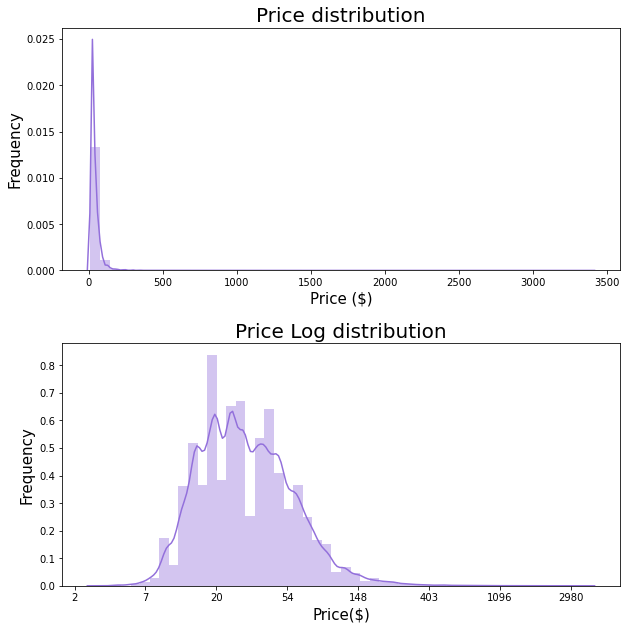

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
graph1 = sns.distplot(wino['price'], color='mediumpurple')
graph1.set_title("Price distribution", fontsize=20) # seting title and size of font
graph1.set_xlabel("Price ($)", fontsize=15) # seting xlabel and size of font
graph1.set_ylabel("Frequency", fontsize=15) # seting ylabel and size of font

plt.subplot(2,1,2)
graph2 = sns.distplot(np.log(wino['price']) , color='mediumpurple')
graph2.set_title("Price Log distribution", fontsize=20) # seting title and size of font
graph2.set_xlabel("Price($)", fontsize=15) # seting xlabel and size of font
graph2.set_ylabel("Frequency", fontsize=15) # seting ylabel and size of font

graph2.set_xticklabels(np.exp(graph2.get_xticks()).astype(int))

plt.subplots_adjust(hspace = 0.3,top = 0.9)
plt.show()

In [26]:
wino.vintage.value_counts()

2016    18506
2015    16314
2017    13077
2014    10098
2018     6712
2013     4787
NV       2451
2012     1891
2011      814
2019      765
2010      399
2009      190
2008      152
2007       86
2006       51
2005       31
2004       24
2001       11
2002       10
1988       10
2003        9
1995        8
2000        8
1996        7
1999        5
1997        3
1968        3
1989        3
1931        3
1969        3
1987        3
1939        3
1991        2
1985        2
1998        2
1963        2
1929        2
1994        2
1977        2
1990        2
1927        1
2067        1
1907        1
1971        1
1957        1
1904        1
1980        1
1979        1
1934        1
1978        1
1982        1
1992        1
1954        1
1962        1
1940        1
Name: vintage, dtype: int64

In [27]:
# Non vintage ones are '2030' in order to understand better.

i = 0
for col in wino[['vintage']]:
    for i in range(len(wino[col])):
        if wino[col][i] == "NV":
            wino[col][i] = 2030
        elif wino[col][i] == 2067:
            wino[col][i] = 2030
            
wino['vintage'] = wino['vintage'].astype(int)

<ipython-input-27-03a53aaf66d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wino[col][i] = 2030


<ipython-input-28-72f217fc5be7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))


[Text(0, 1.0, '2'),
 Text(0, 2.0, '7'),
 Text(0, 3.0, '20'),
 Text(0, 4.0, '54'),
 Text(0, 5.0, '148'),
 Text(0, 6.0, '403'),
 Text(0, 7.0, '1096'),
 Text(0, 8.0, '2980'),
 Text(0, 9.0, '8103')]

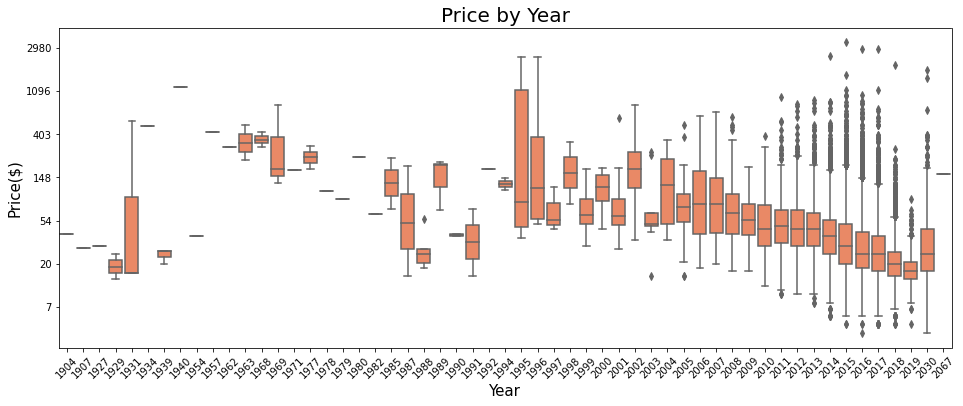

In [28]:
plt.figure(figsize=(16,20))

plt.subplot(3,1,1)

graph = sns.boxplot(x='vintage', y=np.log(wino['price']),
                    data=wino,
                    color='coral')

graph.set_title("Price by Year", fontsize=20)
graph.set_xlabel("Year", fontsize=15)
graph.set_ylabel("Price($)", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))


In [29]:
most_vintage = wino['vintage'].value_counts()[:100].index 
print(wino[wino['vintage'].isin(most_vintage)].groupby('vintage').points.mean().sort_values(ascending=False)[:20])

vintage
1940    96.000000
1927    96.000000
1957    95.000000
1977    95.000000
1982    95.000000
1980    95.000000
2002    94.900000
1968    94.666667
1995    94.500000
1963    94.500000
1985    94.500000
2000    94.125000
1971    94.000000
2067    94.000000
1996    93.428571
2004    93.041667
1934    93.000000
1989    93.000000
1978    93.000000
1994    92.500000
Name: points, dtype: float64


<ipython-input-30-5de741ca6c9a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph2.set_yticklabels(np.exp(graph2.get_yticks()).astype(int))


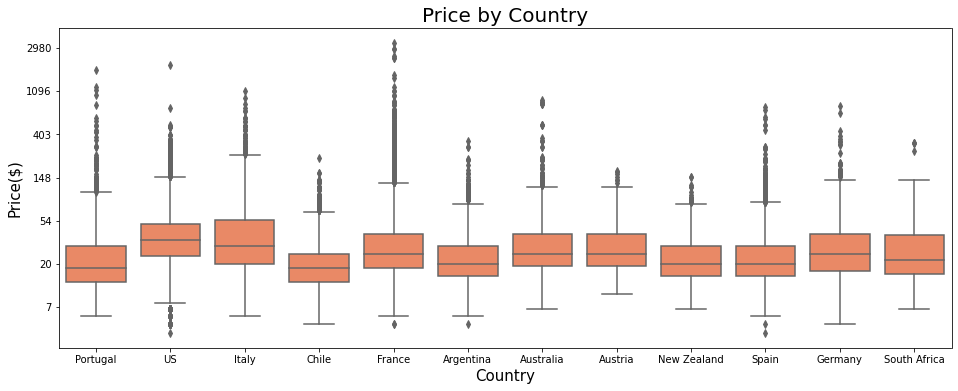

In [30]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,3)
graph2 = sns.boxplot(x='country', y=np.log(wino['price']),
                 data=wino[wino.country.isin(large_countries.index.values)],
                 color='coral')

graph2.set_title("Price by Country", fontsize=20)
graph2.set_xlabel("Country", fontsize=15)
graph2.set_ylabel("Price($)", fontsize=15)
graph2.set_yticklabels(np.exp(graph2.get_yticks()).astype(int))

plt.show()

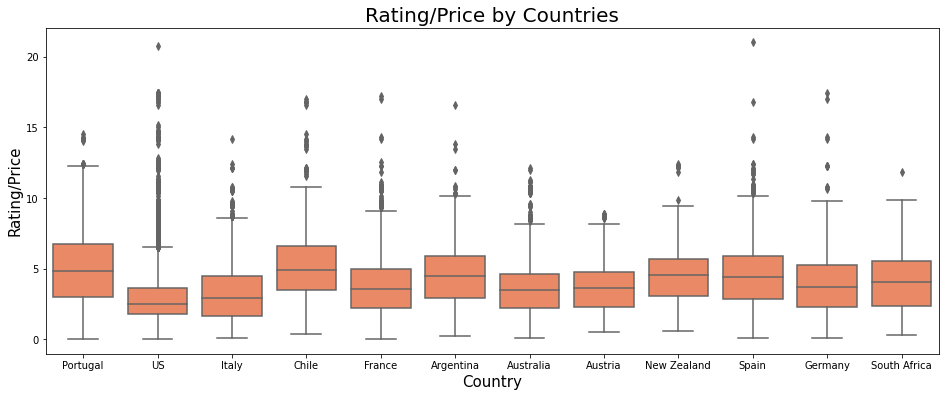

In [31]:
plt.figure(figsize=(16,6))
graph = sns.boxplot(x='country', y=wino['points']/wino['price'],
                 data=wino[wino.country.isin(large_countries.index.values)],
                 color='coral')
graph.set_title("Rating/Price by Countries", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Rating/Price", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

<ipython-input-32-dd57f3f99fc2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))


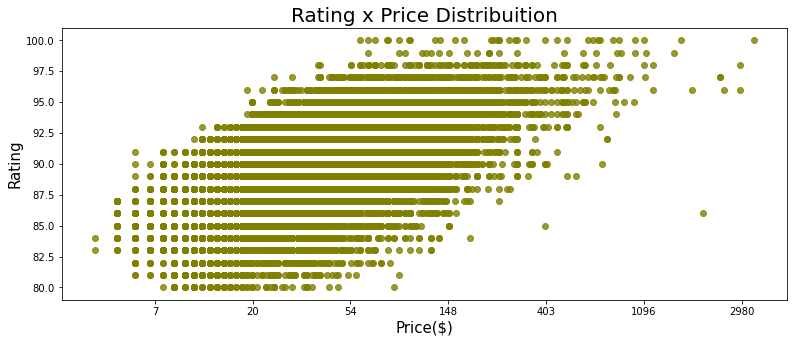

In [32]:
plt.figure(figsize=(13,5))

graph = sns.regplot(x=np.log(wino['price']), y='points', 
                    data=wino, fit_reg=False, color='olive')
graph.set_title("Rating x Price Distribuition", fontsize=20)
graph.set_xlabel("Price($)", fontsize= 15)
graph.set_ylabel("Rating", fontsize= 15)
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))

plt.show()

### Checking if there is any correlation between these features

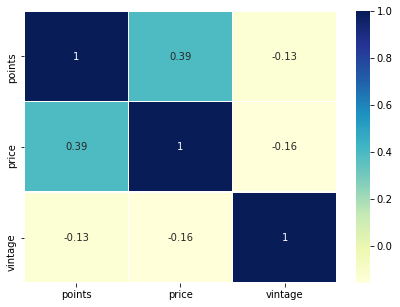

In [33]:
corrs = wino[['points','price','vintage']].corr()

fig, ax = plt.subplots(figsize=(7,5))        

sns.heatmap(corrs,annot = True,ax=ax,linewidths=.6, cmap = 'YlGnBu');

In [34]:
wino['variety'].value_counts().head(20)

Pinot Noir                  8881
Chardonnay                  6340
Cabernet Sauvignon          5036
Red Blends                  4863
Bordeaux-style Red Blend    4110
Rosé                        3279
Riesling                    3033
Sauvignon Blanc             2847
Syrah                       2092
Sangiovese                  1724
Nebbiolo                    1708
Portuguese Red              1632
Sparkling Blend             1549
Rhône-style Red Blend       1360
Gamay                       1348
Malbec                      1344
Zinfandel                   1331
Merlot                      1218
White Blend                 1082
Tempranillo                 1057
Name: variety, dtype: int64

In [35]:
# Encoding categoricals

wino_enc = wino.copy().drop(columns = ['title'])

In [36]:
wino_cat = [col for col in wino_enc.columns if wino_enc[col].dtype == "object"]

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in wino_cat:
    wino_enc[col] = label_encoder.fit_transform(wino_enc[col])

In [38]:
wino_enc

,country,description,designation,points,price,province,region_1,variety,vintage,winery
0,32,57081,1541,87,14.0,87,1033,449,2016,9592
1,40,12365,28125,87,25.0,47,667,79,2014,11958
2,15,8990,28125,87,14.0,161,1033,636,2015,10829
3,23,67548,28125,87,13.0,254,1033,524,2013,10663
4,22,1069,22386,87,13.0,172,955,484,2016,9374
...,...,...,...,...,...,...,...,...,...,...
76463,32,922,20169,94,55.0,8,1033,446,2017,10750
76464,40,20950,17887,94,52.0,47,133,547,2017,6460
76465,22,74867,28125,94,40.0,313,993,467,2016,1191
76466,22,20398,15965,94,113.0,313,993,498,2015,4252


## Modeling

In [39]:
y = wino_enc['price']
X = wino_enc.drop(['price'], axis = 1)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61174, 9)
(15294, 9)
(61174,)
(15294,)


In [42]:
X_train.head()

,country,description,designation,points,province,region_1,variety,vintage,winery
67454,22,16632,28125,88,224,23,429,2019,6968
27035,22,55861,28125,86,313,184,467,2017,1347
11852,3,34504,5061,89,293,1033,505,2016,10684
27630,0,29370,20834,84,187,521,79,2014,474
21193,40,52498,8961,91,47,892,499,2013,803


In [43]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.17112212039241148

In [45]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.18389655114380443

In [46]:
mse = mean_squared_error(y_test, predictions)
print(mse)

1915.5965806267384


In [47]:
import math
rmse = math.sqrt(mse)
print(rmse)

43.76752883847497


In [48]:
correlation = wino_enc.corr()
correlation['price'].sort_values(ascending = False)

price          1.000000
points         0.391835
country        0.038291
description    0.007416
winery         0.002905
region_1      -0.044109
province      -0.045213
designation   -0.055176
variety       -0.076330
vintage       -0.156486
Name: price, dtype: float64

In [49]:
#wino = wino.drop(['description'], axis=1)

In [50]:
#wino['designation'] = wino['designation'].str.replace('-', '_')

In [51]:
#wino['title'] = wino['title'].str.replace(';', '_')
#wino['variety'] = wino['variety'].str.replace('-', '_')

In [52]:
#wino[wino.index == 3499]

In [53]:
#wino.to_csv('wino2.csv', sep =';' ,index=False)

## Adding my csv file to MySQL

In [54]:
import pymysql
from sqlalchemy import create_engine
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [55]:
# Most expensive 10 wines.

connection_string = 'mysql+pymysql://root:' + password + '@localhost/project'
engine = create_engine(connection_string)
query = '''SELECT *
FROM wine
ORDER BY price DESC
LIMIT 10;'''

wino_10 = pd.read_sql_query(query, engine)
wino_10

,country,designation,points,price,province,region_1,title,variety,vintage,winery
0,France,unknown,100,3400,Bordeaux,Pomerol,Château Pétrus 2015 Pomerol,Bordeaux_style Red Blend,2015,Château Pétrus\r
1,France,unknown,96,2950,Bordeaux,Pomerol,Château Pétrus 2017 Pomerol,Bordeaux_style Red Blend,2017,Château Pétrus\r
2,France,unknown,98,2950,Bordeaux,Pomerol,Château Pétrus 2016 Pomerol,Bordeaux_style Red Blend,2016,Château Pétrus\r
3,France,unknown,96,2500,Bordeaux,Pomerol,Château Pétrus 2014 Pomerol,Bordeaux_style Red Blend,2014,Château Pétrus\r
4,France,Cristal Vinothèque Brut Rosé,97,2400,Champagne,Champagne,Louis Roederer 1995 Cristal Vinothèque Brut Ro...,Champagne Blend,1995,Louis Roederer\r
5,France,Cristal Vinothèque Rosé Brut,97,2400,Champagne,Champagne,Louis Roederer 1996 Cristal Vinothèque Rosé Br...,Champagne Blend,1996,Louis Roederer\r
6,US,Nicole Marie,86,2018,California,North Coast,Sean Minor 2018 Nicole Marie Red (North Coast),Red Blends,2018,Sean Minor\r
7,Portugal,CNK 380 Very Old Tawny,96,1800,Port,unknown,Kopke NV CNK 380 Very Old Tawny (Port),Port,2030,Kopke\r
8,France,unknown,100,1600,Bordeaux,Margaux,Château Margaux 2015 Margaux,Bordeaux_style Red Blend,2015,Château Margaux\r
9,France,Grand Siècle Itération 17 Brut,99,1500,Champagne,Champagne,Laurent-Perrier NV Grand Siècle Itération 17 B...,Champagne Blend,2030,Laurent-Perrier\r


In [56]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/project'
engine = create_engine(connection_string)
query = '''SELECT *
FROM wine
WHERE points = 100
ORDER BY price DESC;'''

wino_fav = pd.read_sql_query(query, engine)
wino_fav

,country,designation,points,price,province,region_1,title,variety,vintage,winery
0,France,unknown,100,3400,Bordeaux,Pomerol,Château Pétrus 2015 Pomerol,Bordeaux_style Red Blend,2015,Château Pétrus\r
1,France,unknown,100,1600,Bordeaux,Margaux,Château Margaux 2015 Margaux,Bordeaux_style Red Blend,2015,Château Margaux\r
2,France,Cristal Vinothèque Brut,100,1100,Champagne,Champagne,Louis Roederer 1996 Cristal Vinothèque Brut (...,Champagne Blend,1996,Louis Roederer\r
3,France,unknown,100,1000,Bordeaux,Saint-Émilion,Château Ausone 2015 Saint-Émilion,Bordeaux_style Red Blend,2015,Château Ausone\r
4,France,unknown,100,848,Bordeaux,Pessac-Léognan,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux_style White Blend,2014,Château Haut-Brion\r
5,France,unknown,100,800,Bordeaux,Saint-Émilion,Château Cheval Blanc 2015 Saint-Émilion,Bordeaux_style Red Blend,2015,Château Cheval Blanc\r
6,France,unknown,100,700,Bordeaux,Pauillac,Château Lafite Rothschild 2015 Pauillac,Bordeaux_style Red Blend,2015,Château Lafite Rothschild\r
7,Italy,Riserva,100,689,Tuscany,Brunello di Montalcino,Biondi-Santi 2012 Riserva (Brunello di Montal...,Sangiovese,2012,Biondi-Santi\r
8,France,unknown,100,650,Bordeaux,Pessac-Léognan,Château Haut-Brion 2016 Pessac-Léognan,Bordeaux_style Red Blend,2016,Château Haut-Brion\r
9,France,Le Mesnil Blanc de Blancs Brut,100,617,Champagne,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,2006,Salon\r


In [57]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/project'
engine = create_engine(connection_string)
query = '''SELECT *
FROM wine
ORDER BY vintage ASC
LIMIT 25;'''

wino_old = pd.read_sql_query(query, engine)
wino_old

,country,designation,points,price,province,region_1,title,variety,vintage,winery
0,France,1904 Cuvée Spéciale Brut,91,40,Alsace,Crémant d'Alsace,Arthur Metz NV 1904 Cuvée Spéciale Brut Sparkl...,Sparkling Blend,1904,Arthur Metz\r
1,Italy,1907 Brut,88,29,Northeastern Italy,Trento,Cantina d'Isera NV 1907 Brut Chardonnay (Trento),Chardonnay,1907,Cantina d'Isera\r
2,Spain,Solera 1927,96,30,Andalucia,Montilla-Moriles,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez,1927,Alvear\r
3,Italy,Aurea Riserva,86,25,Tuscany,Vernaccia di San Gimignano,Guidi 1929 2015 Aurea Riserva (Vernaccia di S...,Vernaccia,1929,Guidi 1929\r
4,Italy,unknown,87,14,Tuscany,Vernaccia di San Gimignano,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,1929,Guidi 1929\r
5,Italy,Cuvée 1931,91,16,Italy Other,Vino Spumante,BiancaVigna NV Cuvée 1931 Sparkling (Vino Spum...,Sparkling Blend,1931,BiancaVigna\r
6,Italy,Cuvée 1931 Rosa,89,16,Italy Other,Vino Spumante,BiancaVigna NV Cuvée 1931 Rosa Sparkling (Vino...,Sparkling Blend,1931,BiancaVigna\r
7,Portugal,Tinto,89,550,Colares,unknown,Adega Viuva Gomes 1931 Tinto Red (Colares),Ramisco,1931,Adega Viuva Gomes\r
8,Portugal,Reserva Velho,93,495,Colares,unknown,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,1934,Adega Viuva Gomes\r
9,Italy,Don Fortunato 1939 Brut,85,20,Southern Italy,Calabria,Tenuta Iuzzolini NV Don Fortunato 1939 Brut Sp...,Sparkling Blend,1939,Tenuta Iuzzolini\r


In [58]:
# Checking if there are any dublicates.

#wino = wino.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [59]:
# My final csv file.

#wino.to_csv('final_wino.csv',index=False)